In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from matplotlib import cm, colors
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

import nanonets_utils
import nanonets

### Input - Output

In [32]:
time_vals   = np.loadtxt("../1I_1O_radius_dis/time.csv")*1e9
time_vals   = np.delete(time_vals,-1)
dic_R       = {}

for seed in range(10):
    
    dic_R[seed] = {R_val : pd.read_csv(f"../1I_1O_radius_dis/data/Nx=7_Ny=7_Nz=1_Ne=2_{R_val}_{seed}.csv") for R_val in [20,40,80,160,320]}

In [33]:
max(dic_R[0].keys())

320

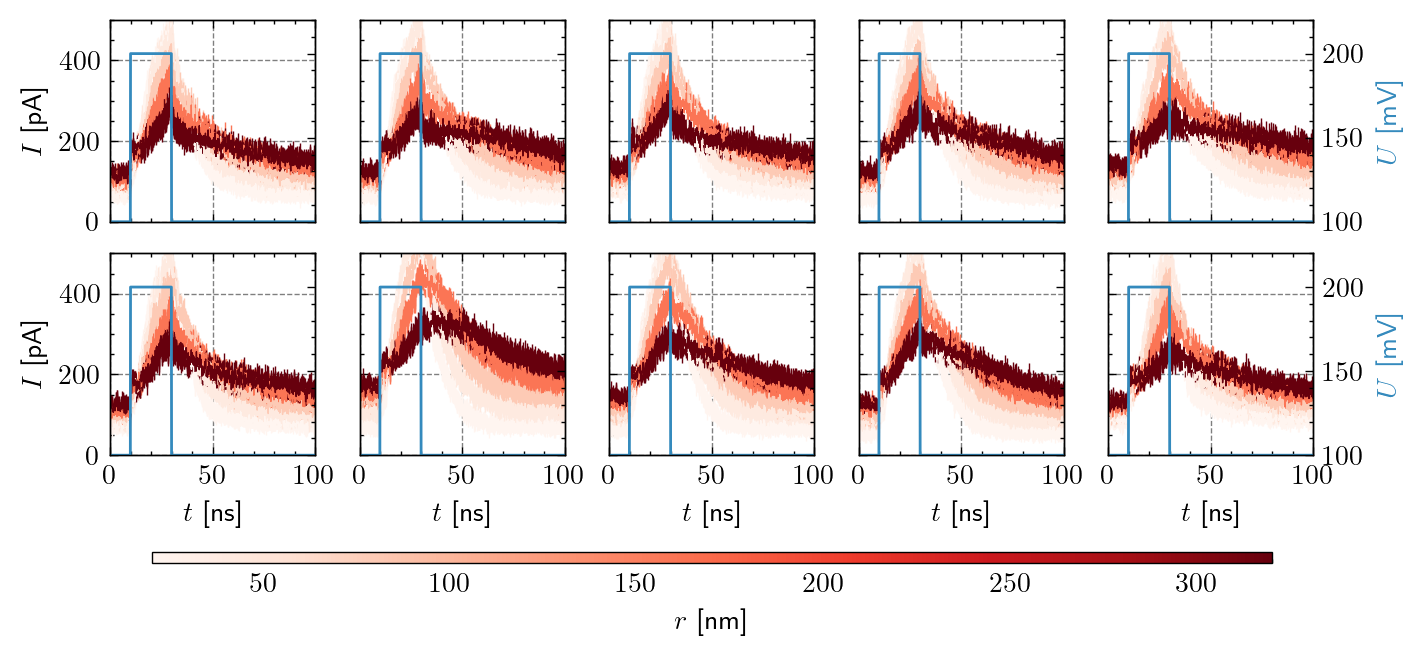

In [34]:
cmap    = plt.get_cmap('Reds')
ncol    = 5
nrow    = 2
norm    = colors.Normalize(min(dic_R[0].keys()), max(dic_R[0].keys()))

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight())

    for seed in range(10):

        ax  = fig.add_subplot(nrow,ncol,seed+1)

        for i, (key, df_base) in enumerate(dic_R[seed].items()):
            # ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(i/(len(dic_R[seed].keys())-1)), label=f'$r = {key}$ nm')
            ax.errorbar(time_vals, df_base['Current'], df_base['Error'], marker='', markevery=2, lw=0.5, c=cmap(norm(key)), label=f'$r = {key}$ nm')
            
        if (seed % ncol == 0):
            ax.set_ylabel('$I$ [pA]')
        else:
            ax.set_yticklabels('')
        if (seed >= (nrow*ncol - ncol)):
            ax.set_xlabel('$t$ [ns]')
        else:
            ax.set_xticklabels("")

        # ax.legend(fontsize='x-small', ncol=2)
        ax.set_xlim(0,100)
        ax.set_ylim(0,500)

        ax2 = ax.twinx()
        ax2.plot(time_vals, df_base['E0']*1000, marker='', c=nanonets_utils.blue_color)

        if (seed % ncol == (ncol-1)):
            ax2.set_ylabel('$U$ [mV]', c=nanonets_utils.blue_color)
        else:
            ax2.set_yticklabels('')

        ax2.grid(False)
        ax2.set_ylim(100,220)

    cbar_ax = fig.add_axes([0.1, -0.05, 0.8, 0.02])
    fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, orientation='horizontal', label='$r$ [nm]')
    fig.savefig("plots/I_O_radius.png")

In [35]:
fit_params_uniform = np.loadtxt("data/fit_params_uniform.csv")
fit_params_uniform

array([[-1.12638413e+00,  4.03898339e+01],
       [-5.62806276e-01,  2.33784660e+01],
       [-3.15075681e-01,  1.57951416e+01],
       [-2.01251564e-01,  1.22082414e+01],
       [-1.17180402e-01,  9.45037126e+00],
       [-1.00942307e-01,  8.74945391e+00],
       [-6.64448872e-02,  7.32144925e+00],
       [-6.59746911e-02,  6.95479776e+00],
       [-3.53351211e-02,  5.57358757e+00],
       [-3.11861589e-02,  4.92839330e+00]])

In [36]:
dic_fits = {}

for seed in range(0,10):
    
    fits    = []
    x_start = 300
    x_end   = 500

    for key in dic_R[seed].keys():
        x_new   = time_vals
        y_new   = np.log(dic_R[seed][key]['Current'].values - np.mean(dic_R[seed][key]['Current'].values[:50]))
        fits.append(np.polyfit(x_new[x_start:x_end], y_new[x_start:x_end], 1))

    fits            = np.array(fits)
    dic_fits[seed]  = fits

fits

/tmp/ipykernel_533122/1415431168.py:11: RuntimeWarning: invalid value encountered in log
  y_new   = np.log(dic_R[seed][key]['Current'].values - np.mean(dic_R[seed][key]['Current'].values[:50]))


array([[-0.12516689,  9.65529254],
       [-0.09478872,  8.78341124],
       [-0.06189411,  7.571447  ],
       [-0.03733247,  6.50287728],
       [-0.02457371,  5.63711329]])

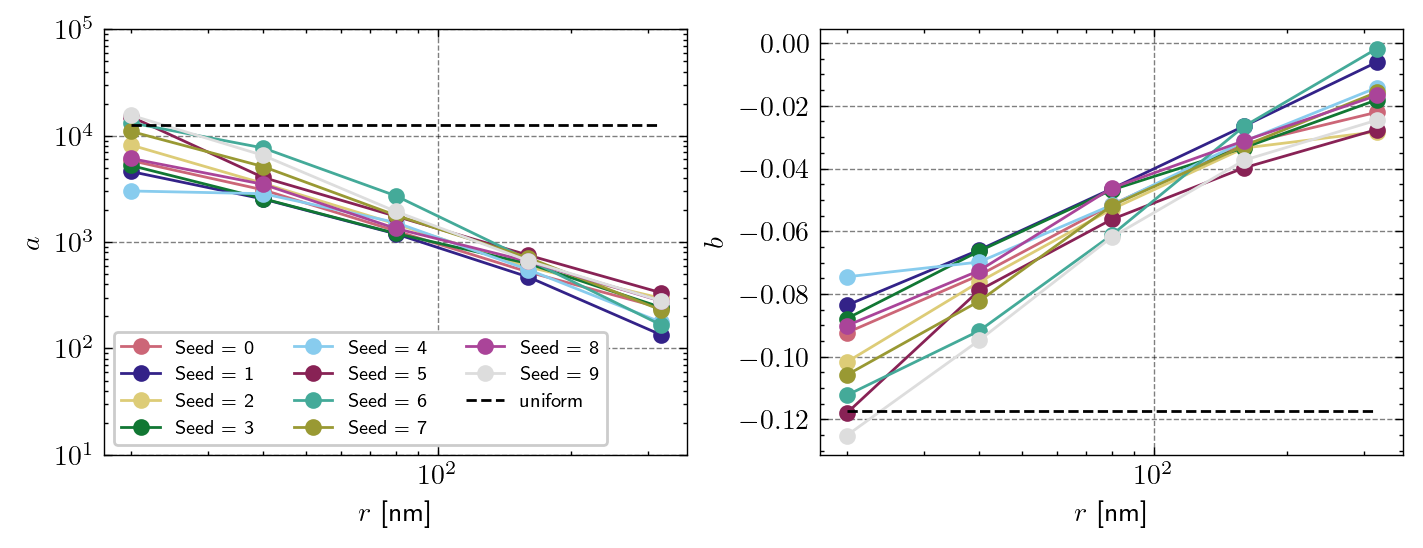

In [37]:
min_R = min(list(dic_R[seed].keys()))
max_R = max(list(dic_R[seed].keys()))

with plt.style.context(["science","muted","grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    ax  = fig.add_subplot(1,2,1)

    for seed in range(10):
        ax.plot(np.array(list(dic_R[seed].keys())), np.exp(dic_fits[seed][:,1]), 'o-', label=f'Seed = {seed}', ms=5)

    ax.hlines(np.exp(fit_params_uniform[4,1]), min_R, max_R, colors='black', linestyles='dashed', label='uniform')

    ax.set_ylabel('$a$')
    ax.set_xlabel('$r$ [nm]')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_ylim(1e1, 1e5)
    ax.legend(fontsize='x-small', ncol=3)
    ax  = fig.add_subplot(1,2,2)

    for seed in range(10):
        ax.plot(np.array(list(dic_R[seed].keys())), dic_fits[seed][:,0], 'o-', ms=5)

    ax.hlines(fit_params_uniform[4,0], min_R, max_R, colors='black', linestyles='dashed', label='uniform')
    
    ax.set_ylabel('$b$')
    ax.set_xlabel('$r$ [nm]')
    ax.set_xscale('log')
    fig.savefig("plots/I_O_fit_values_radius.png")